# PDB conversion

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import logging
from eden.util import configure_logging
configure_logging(logging.getLogger(), verbosity=1)
from IPython.core.display import HTML
HTML('<style>.container { width:95% !important; }</style><style>.output_png {display: table-cell;text-align: center;vertical-align: middle;}</style>')

/Users/costa/anaconda/envs/eden_env/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/costa/anaconda/envs/eden_env/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
pdb_fname = '4uug.pdb'
ligand_marker = 'PXG'

from eden_prot.io.pdb import load 
structure = load(pdb_fname)

/Users/costa/anaconda/envs/eden_env/lib/python2.7/site-packages/Bio/PDB/StructureBuilder.py:87: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12110.
  PDBConstructionWarning)
/Users/costa/anaconda/envs/eden_env/lib/python2.7/site-packages/Bio/PDB/StructureBuilder.py:87: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 12189.
  PDBConstructionWarning)
/Users/costa/anaconda/envs/eden_env/lib/python2.7/site-packages/Bio/PDB/StructureBuilder.py:87: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12264.
  PDBConstructionWarning)
/Users/costa/anaconda/envs/eden_env/lib/python2.7/site-packages/Bio/PDB/StructureBuilder.py:87: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 13106.
  PDBConstructionWarning)


In [3]:
%%time
from eden_prot import make_trimmed_ligand_protein_graph
trimmed_ligand_protein_graph = make_trimmed_ligand_protein_graph(structure, ligand_marker, 
                                                                 min_dist_conj=0,
                                                                 max_dist_conj=5,
                                                                 max_dist_disj=7,
                                                                 depth=1, 
                                                                 interaction_distance_th=4)

CPU times: user 8.12 s, sys: 113 ms, total: 8.23 s
Wall time: 8.23 s


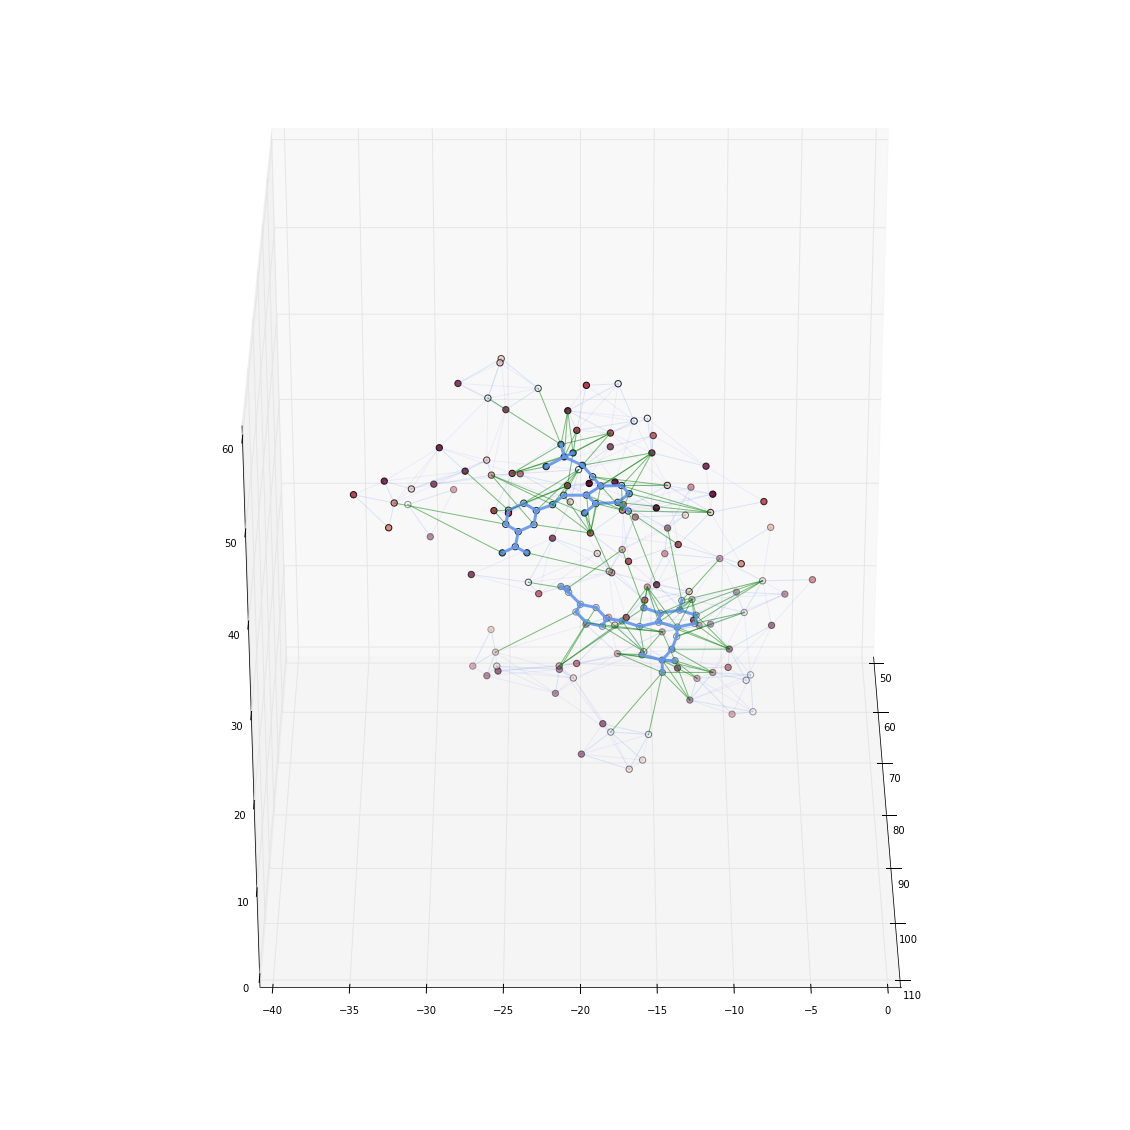

In [4]:
from eden_prot.display import plot3d
plot3d(trimmed_ligand_protein_graph)

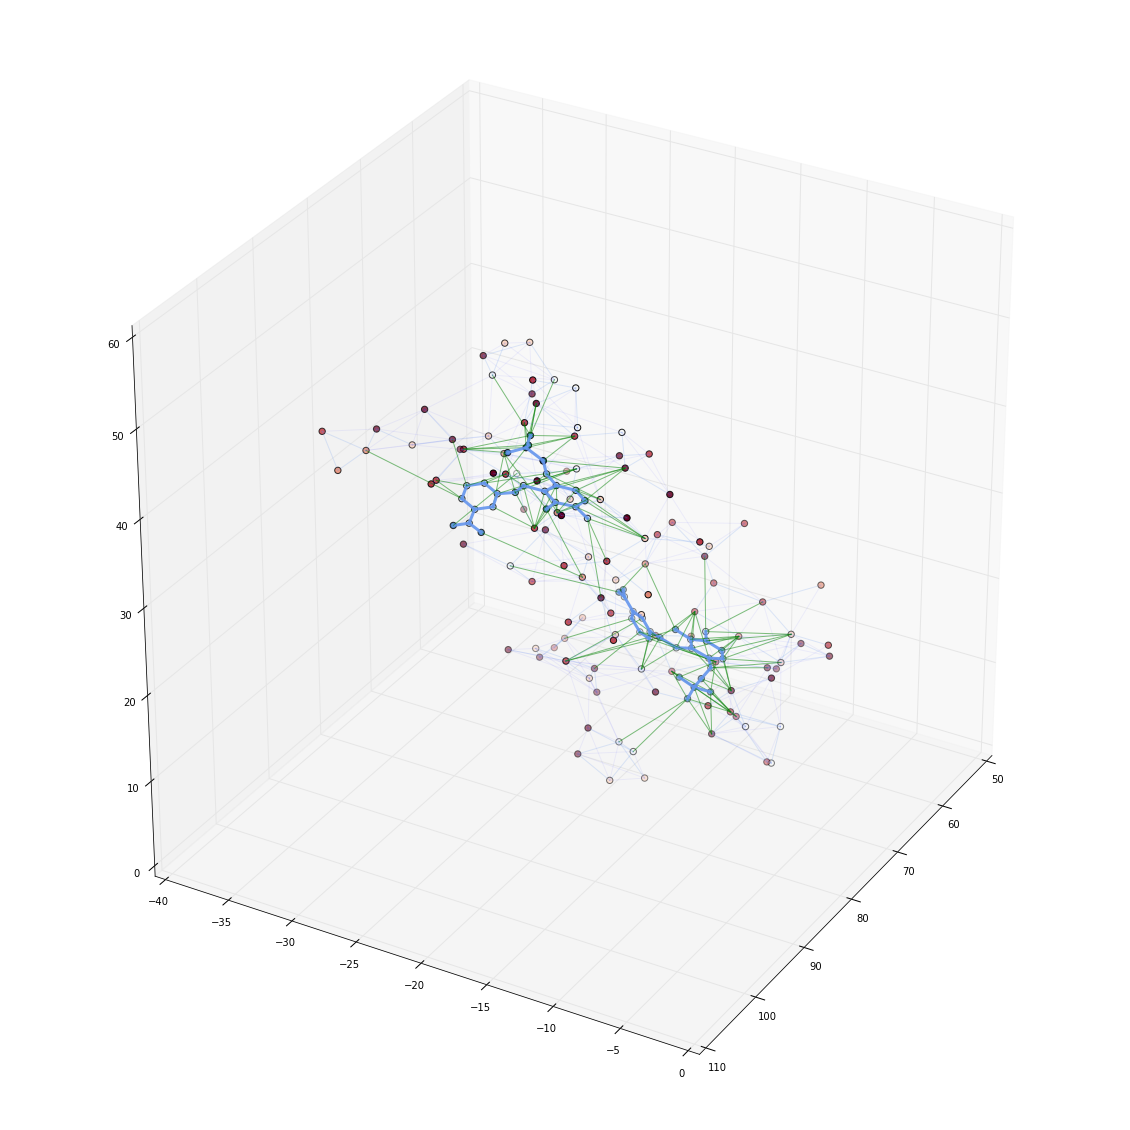

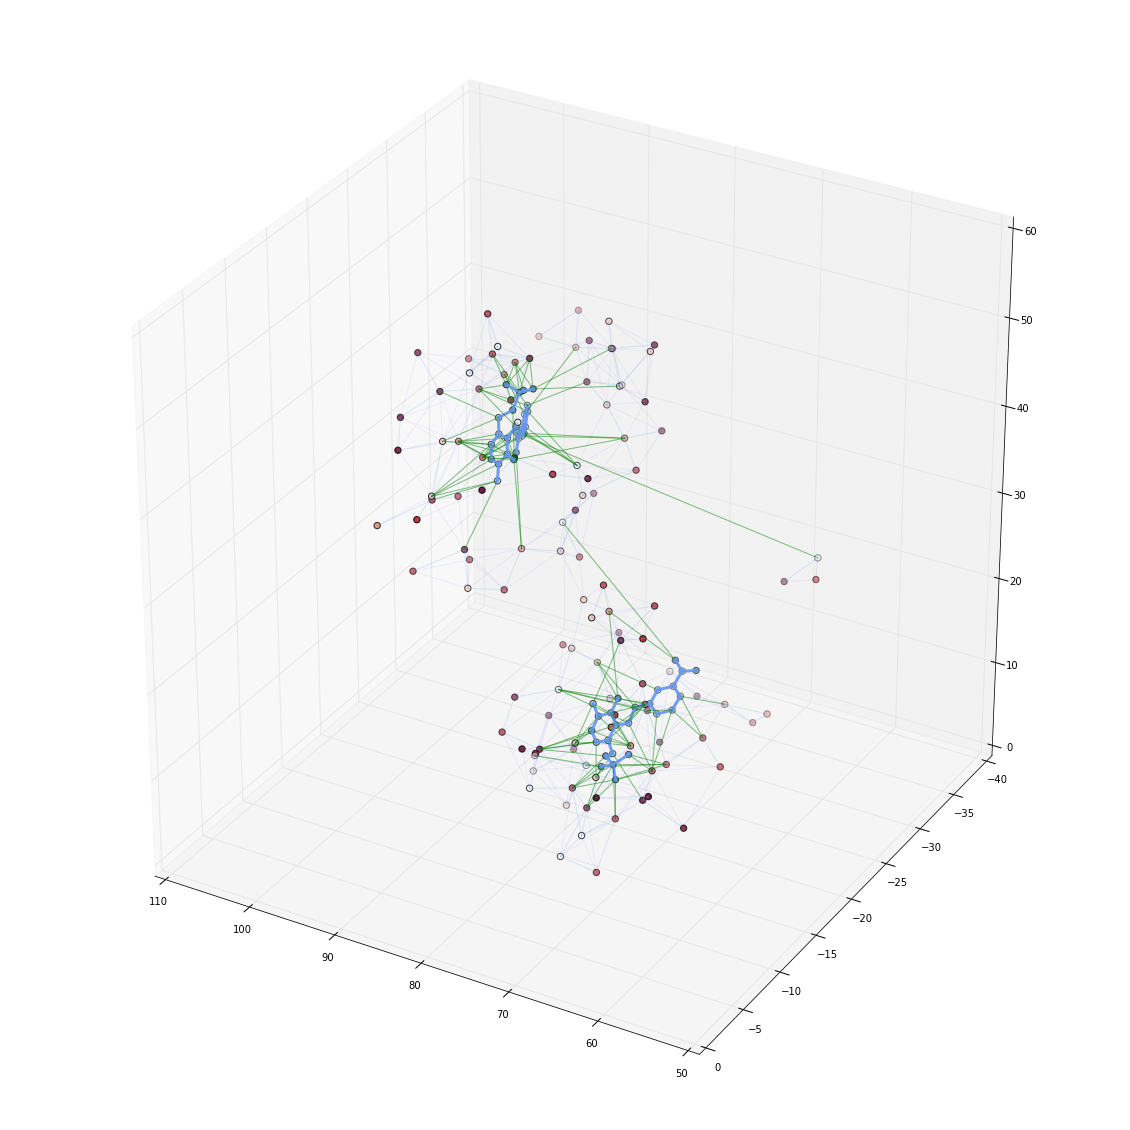

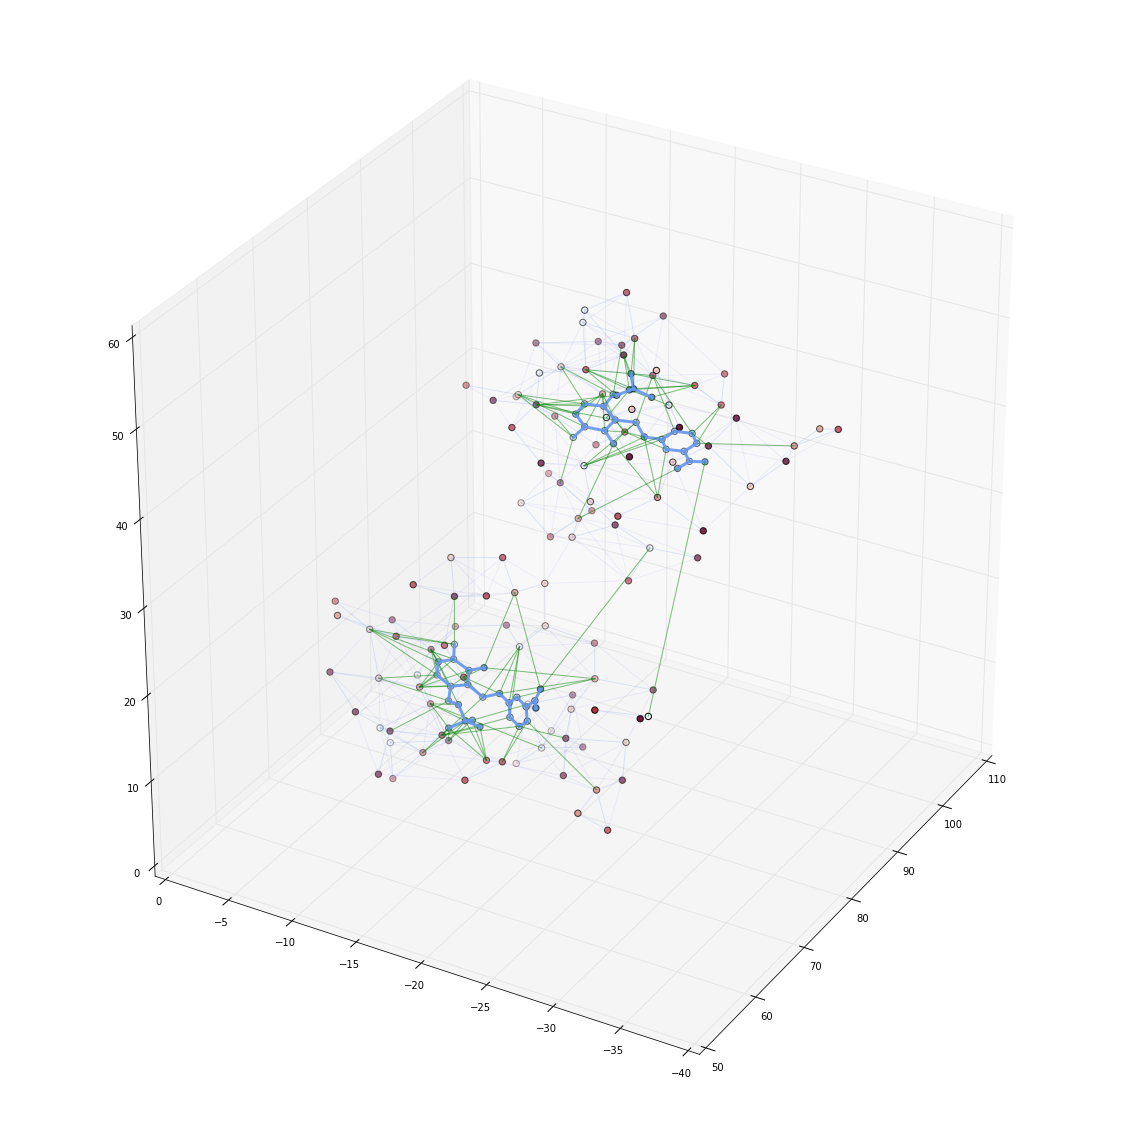

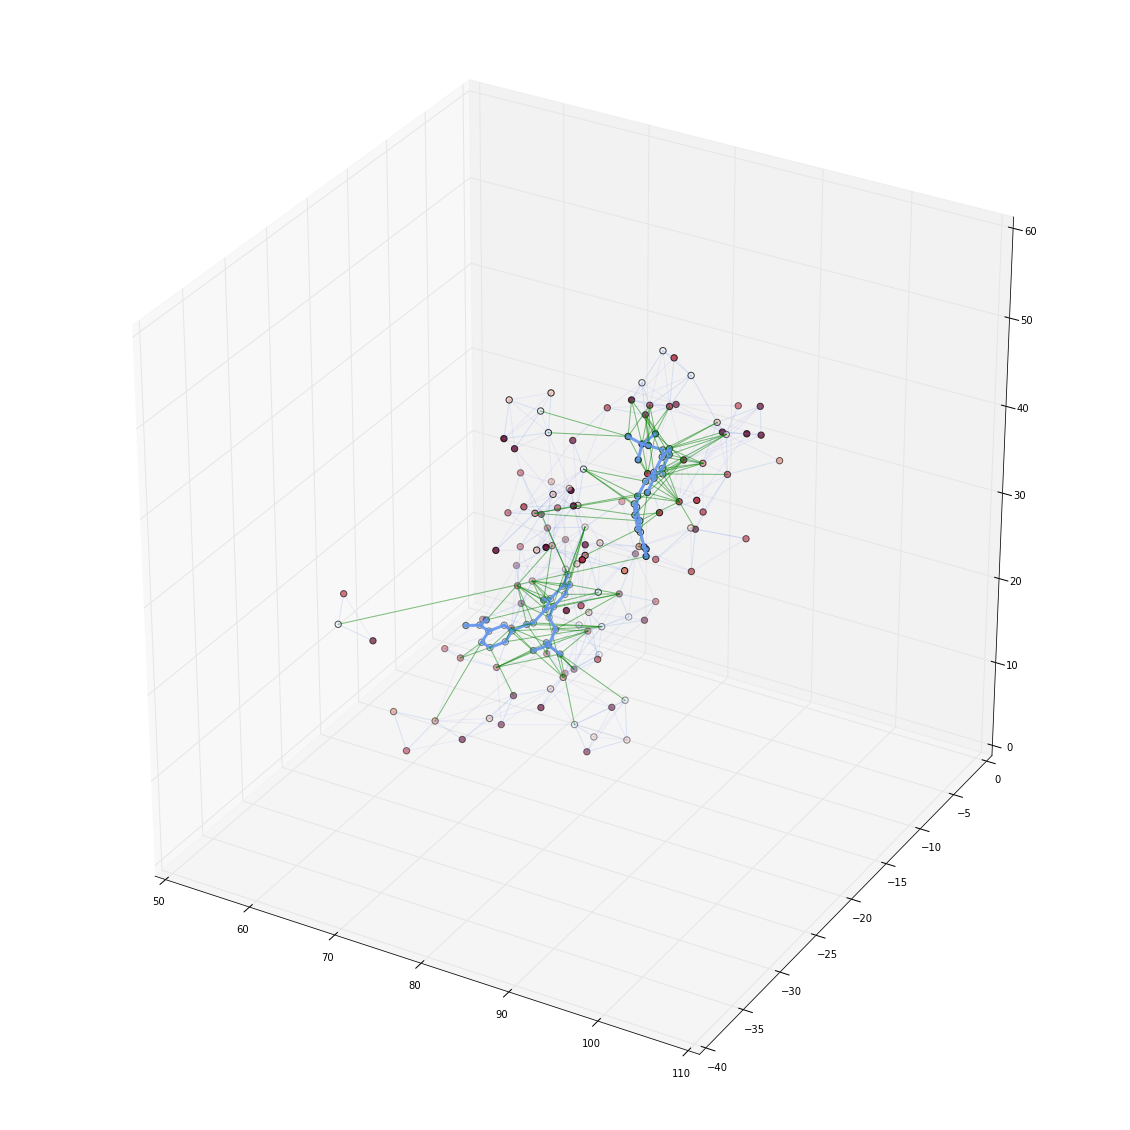

In [5]:
for angle in range(0, 360, 90):
    plot3d(trimmed_ligand_protein_graph, 30 + angle)

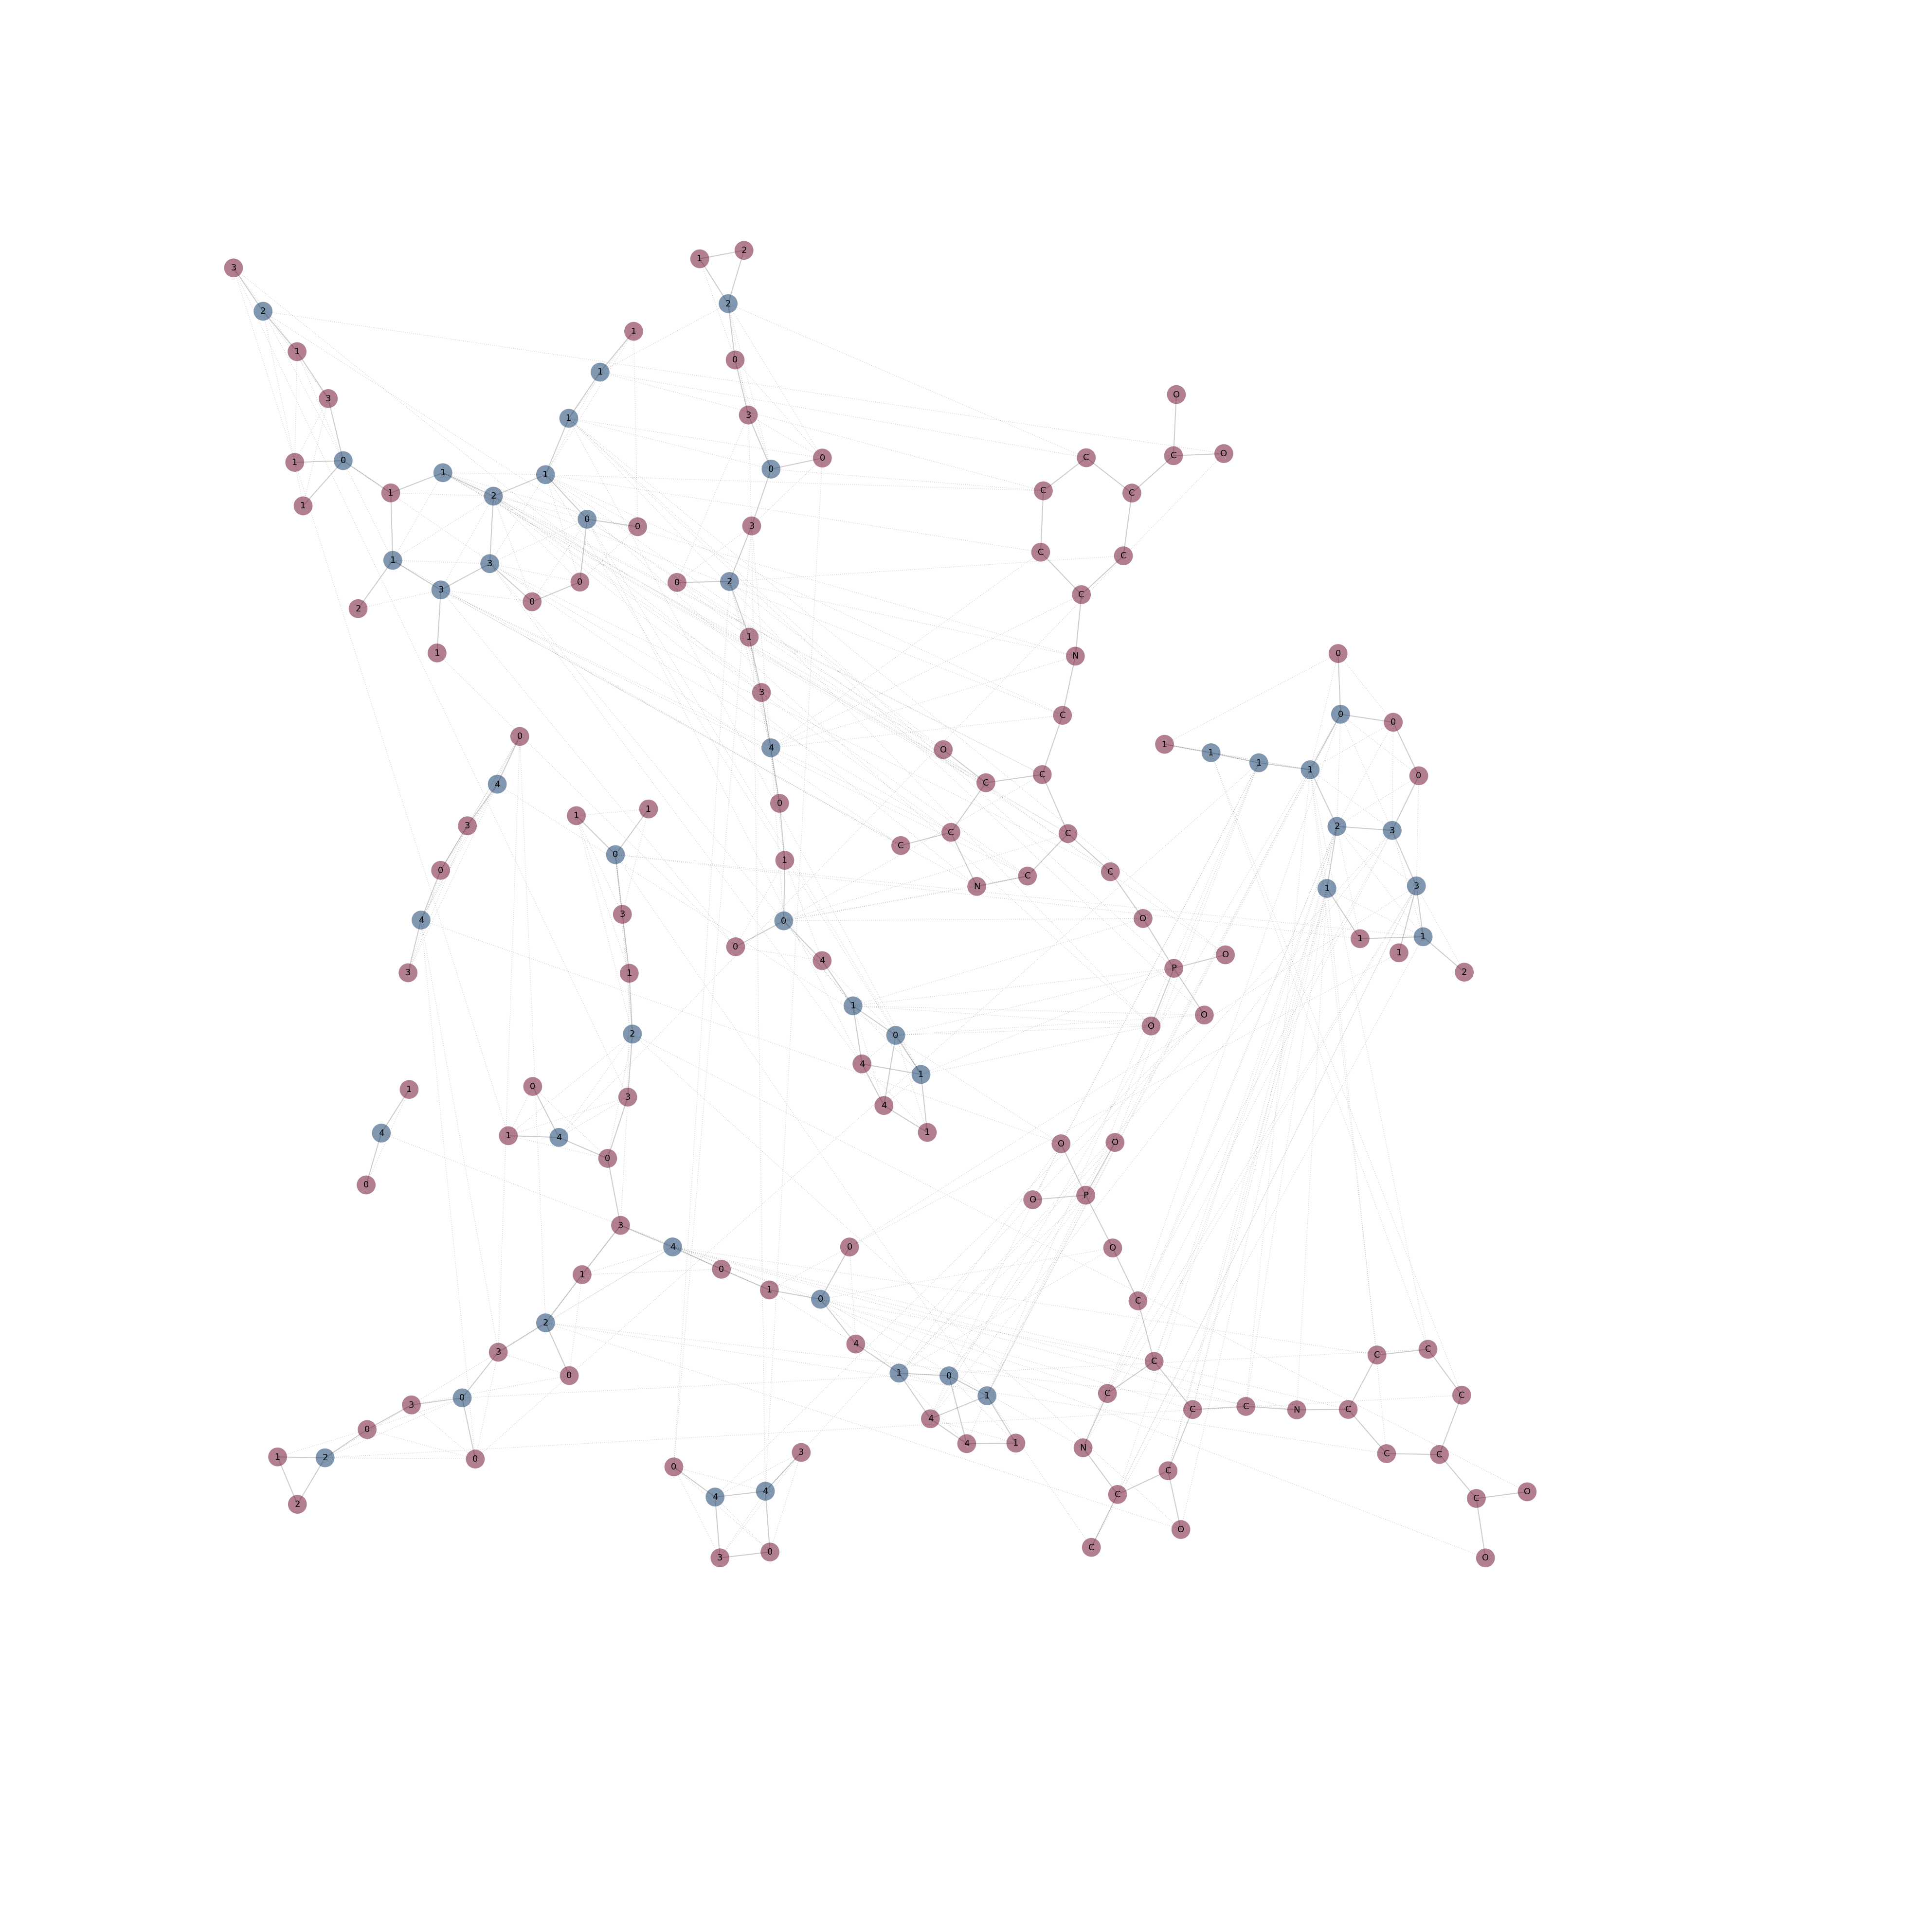

In [6]:
from eden_prot.display import draw_ligand_protein
draw_ligand_protein(trimmed_ligand_protein_graph)

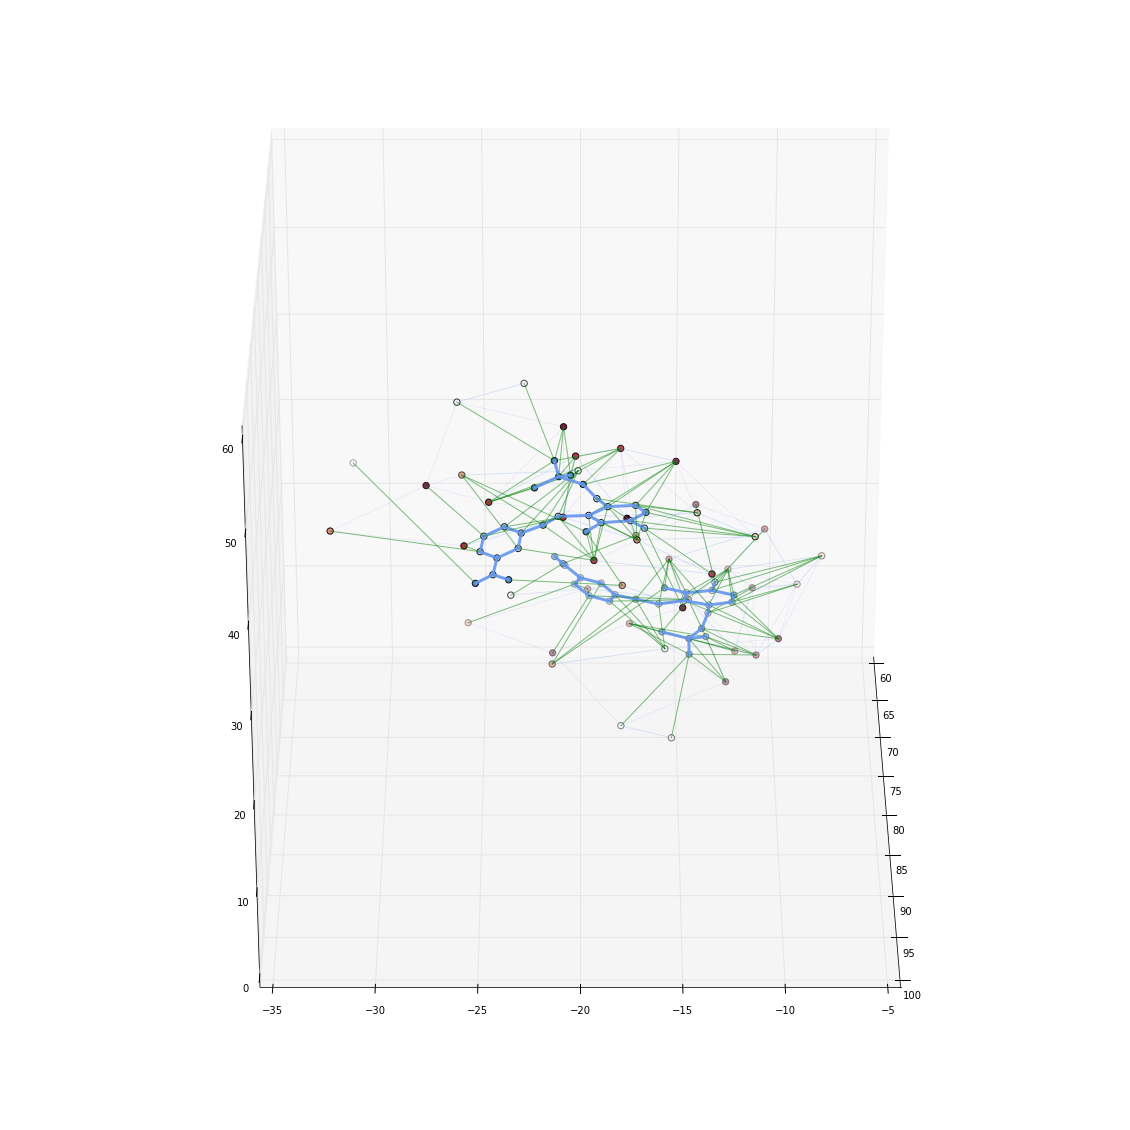

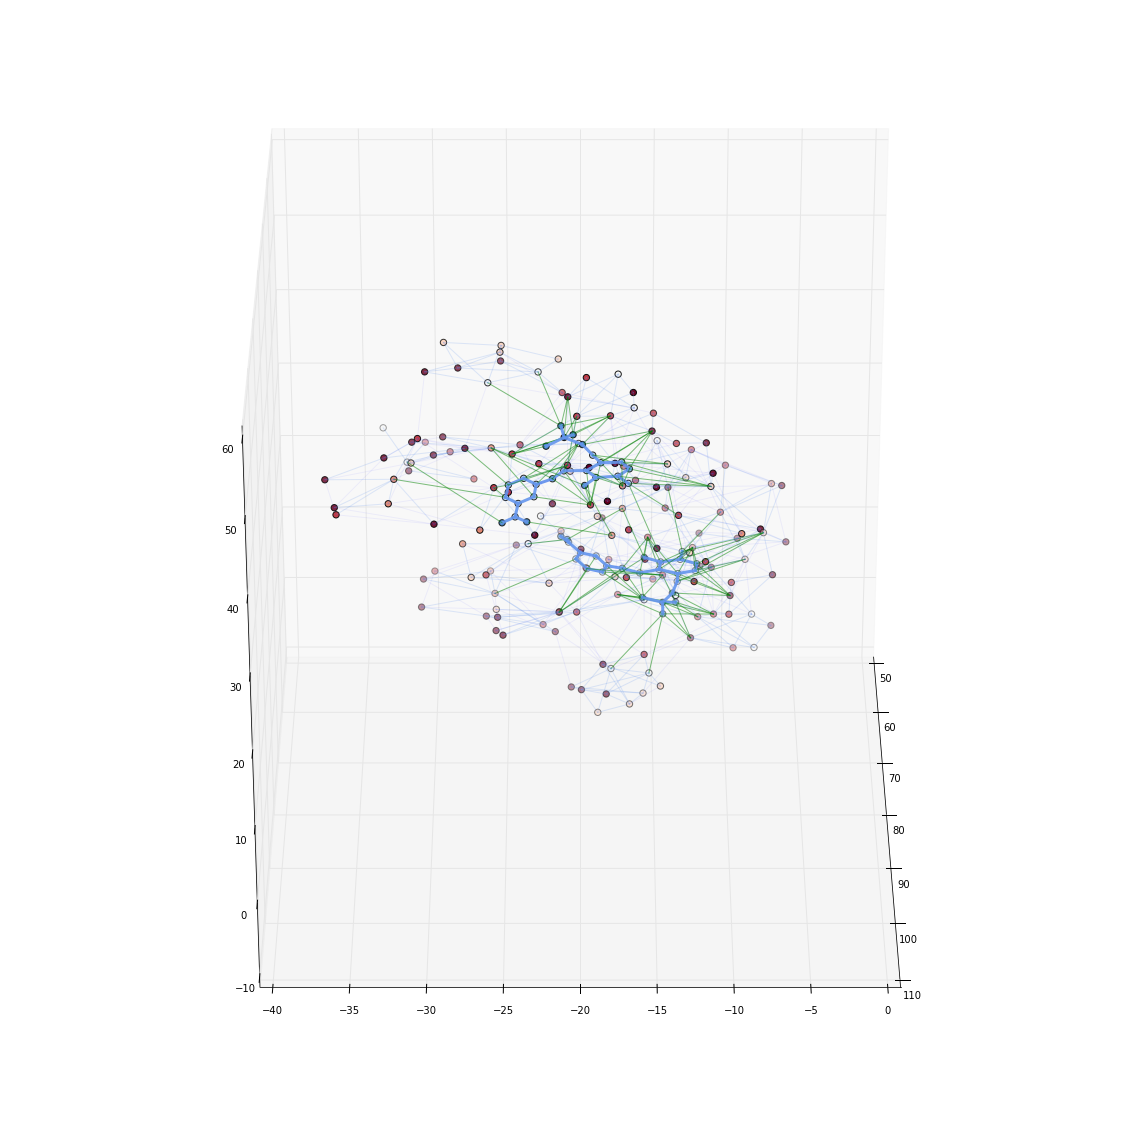

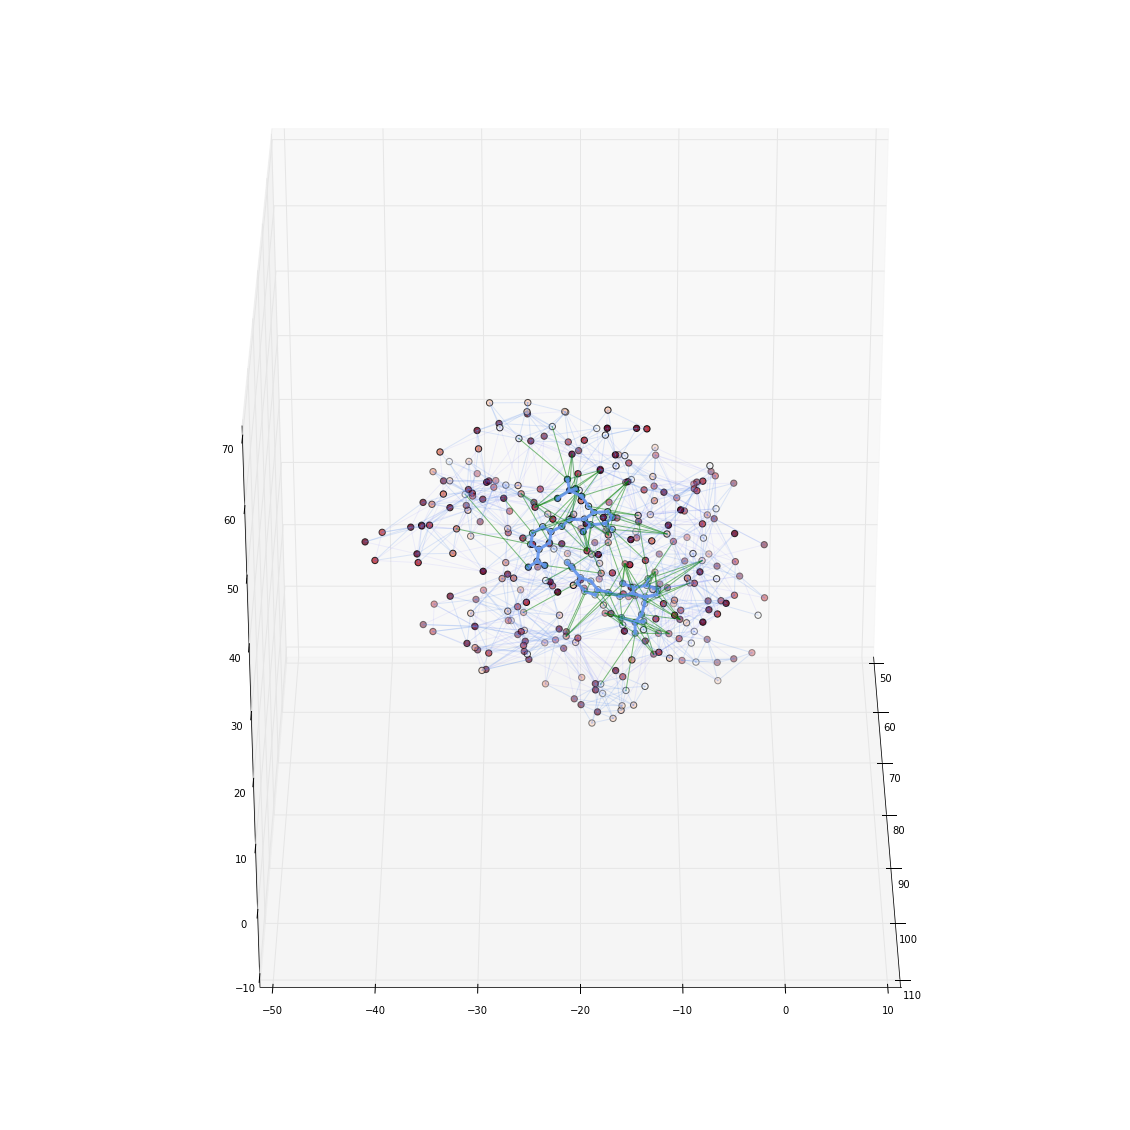

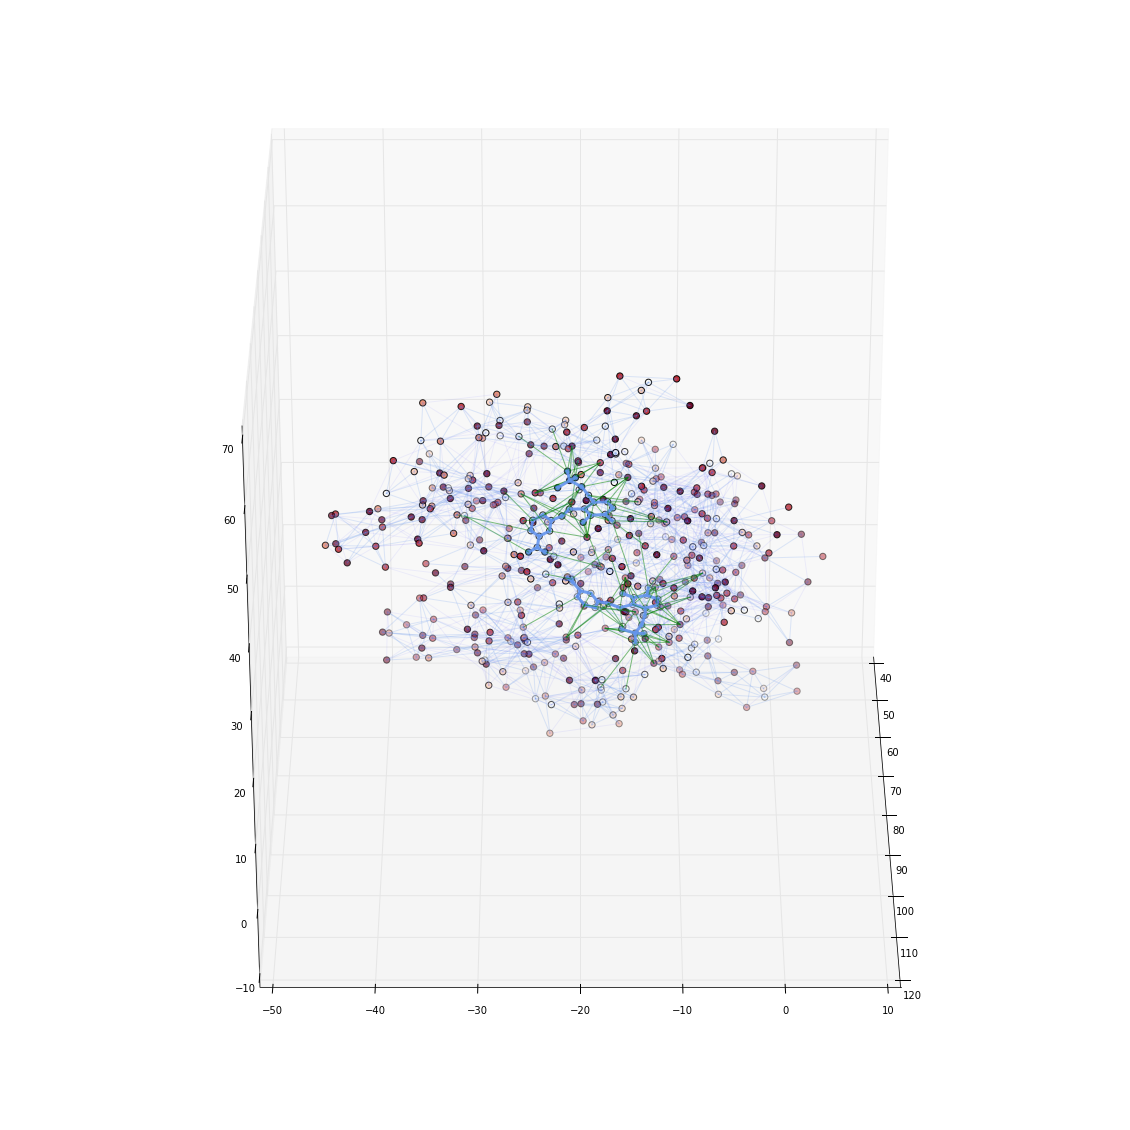

In [7]:
for depth in [0,1,2,3]:
    trimmed_ligand_protein_graph = make_trimmed_ligand_protein_graph(structure, ligand_marker, depth=depth, interaction_distance_th=4)
    plot3d(trimmed_ligand_protein_graph)

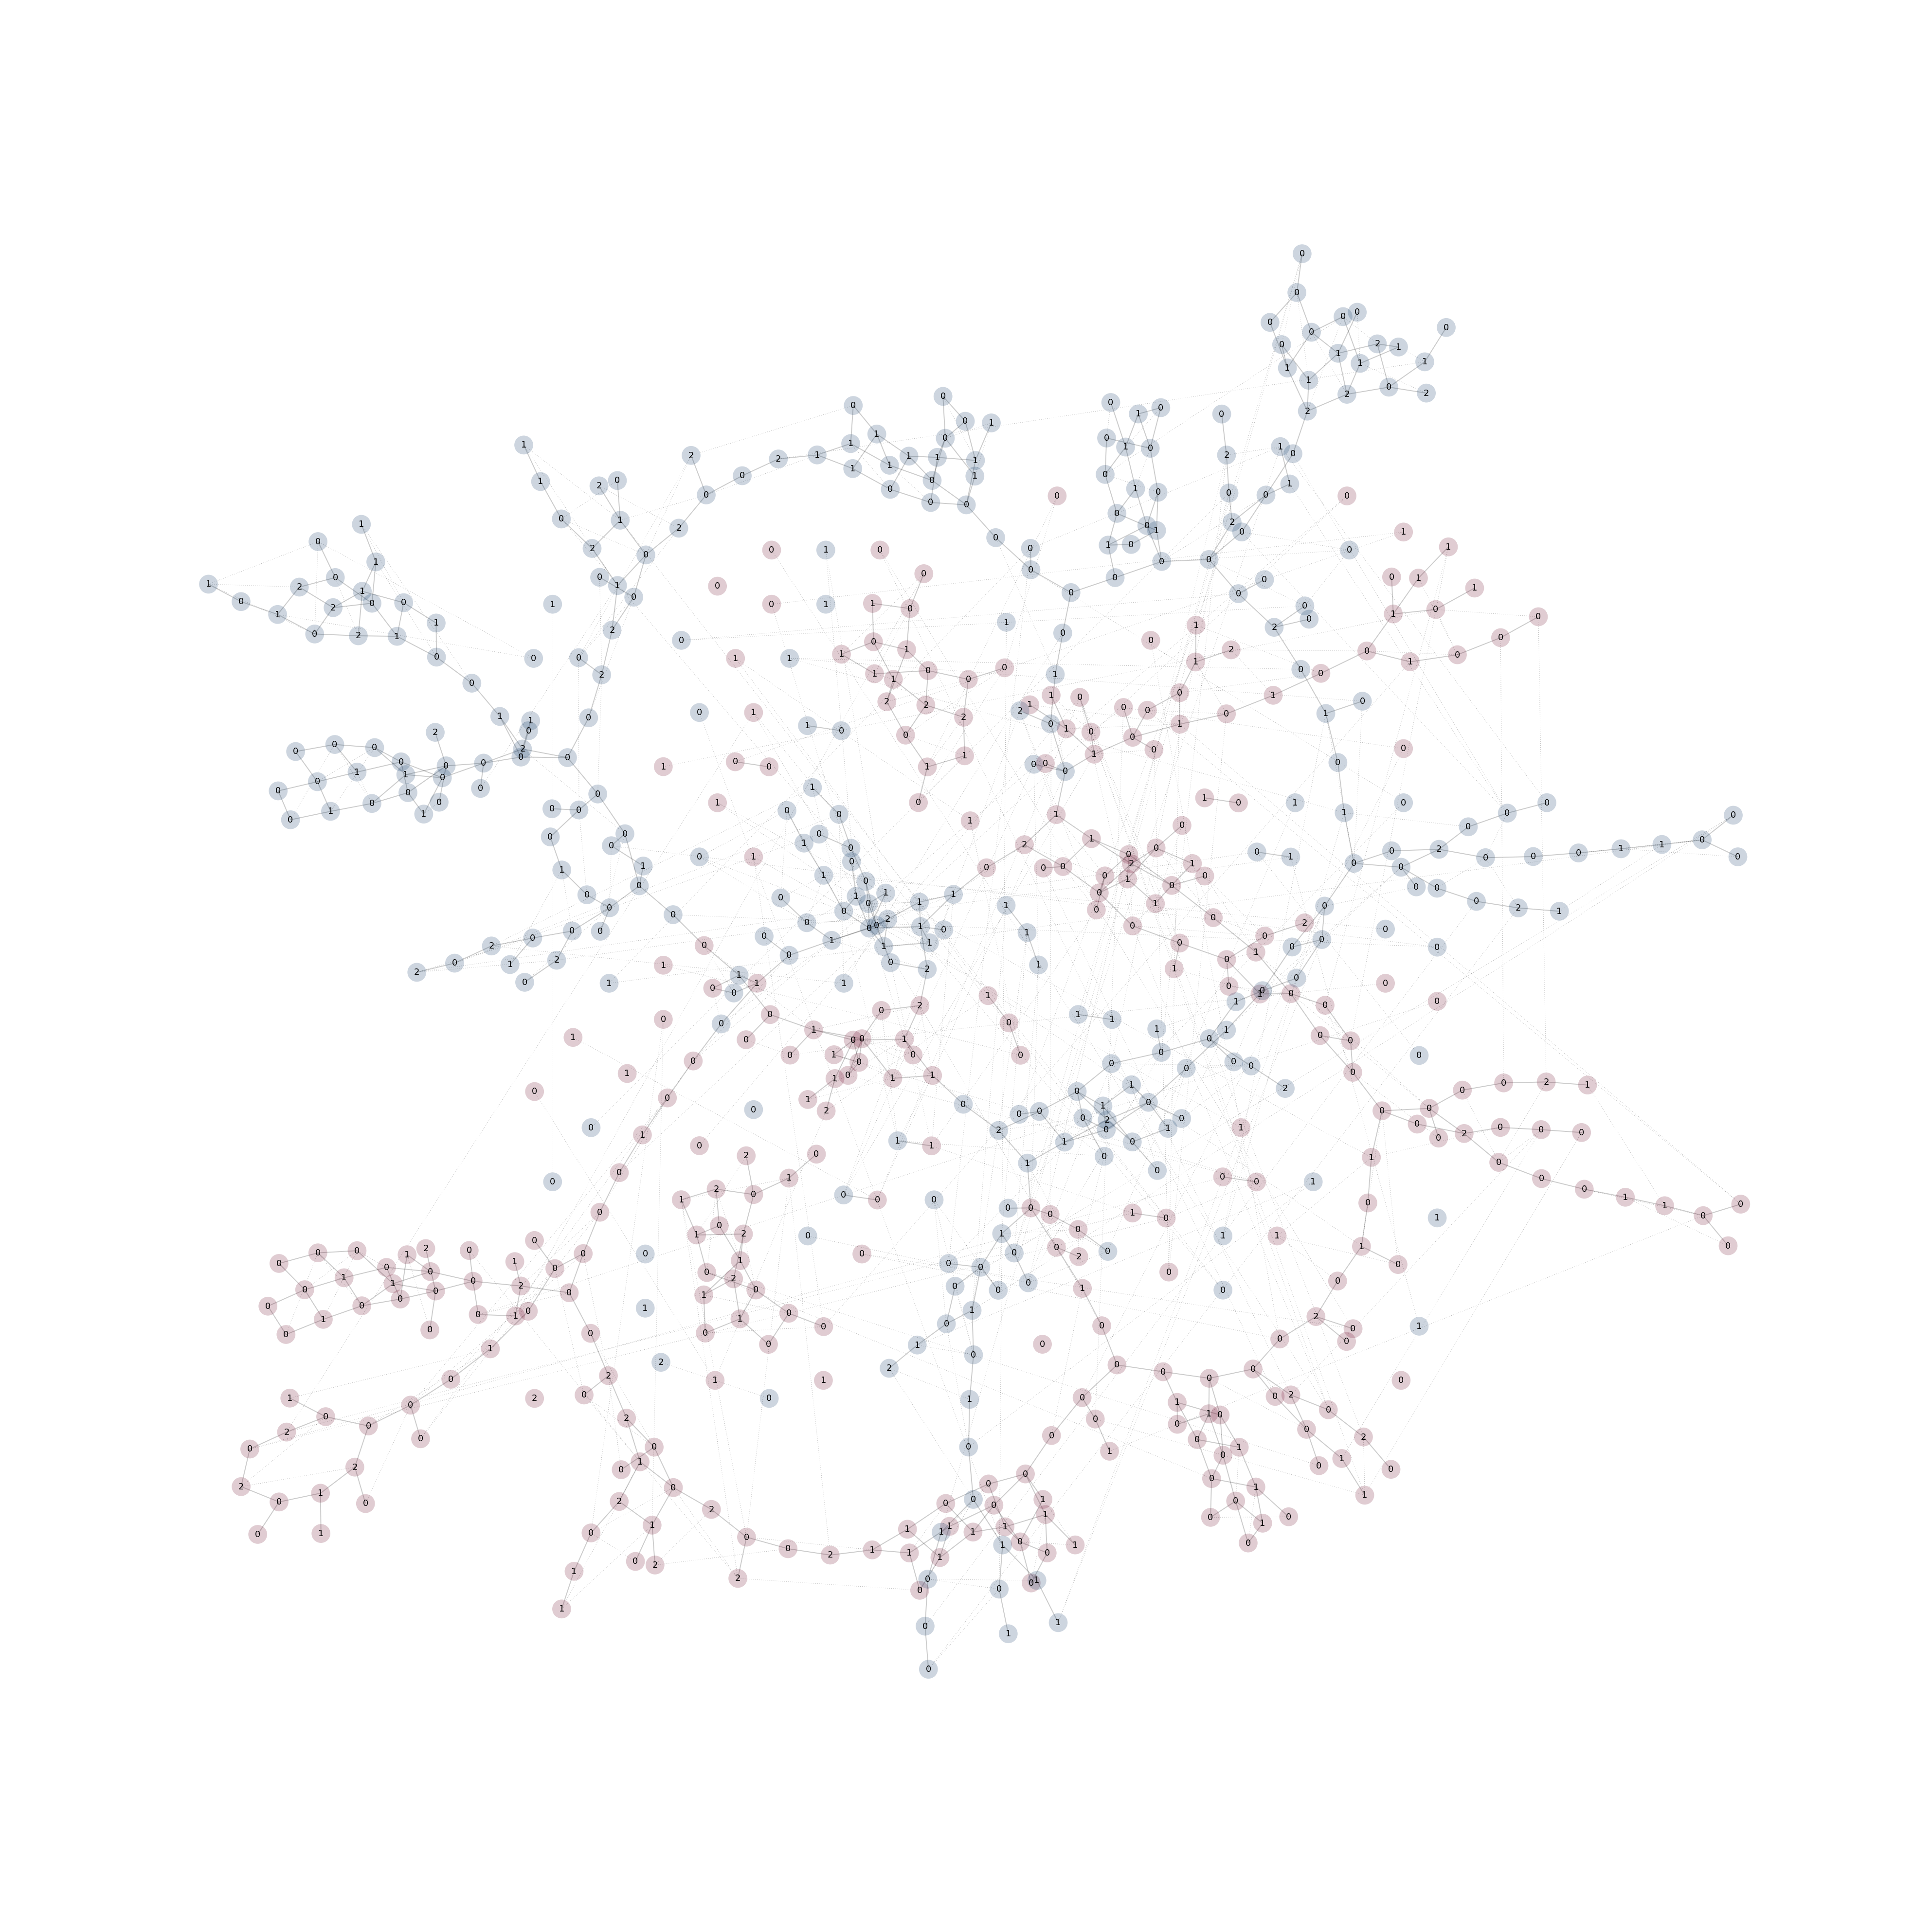

In [8]:
from eden_prot import make_protein_graph, relabel_protein_graph
protein_graph = make_protein_graph(structure,
                                   min_dist_conj=4,
                                   max_dist_conj=5.5,
                                   max_dist_disj=6)
protein_graph = relabel_protein_graph(protein_graph, scheme='code_3')
from eden_prot.display import draw_protein
draw_protein(protein_graph)

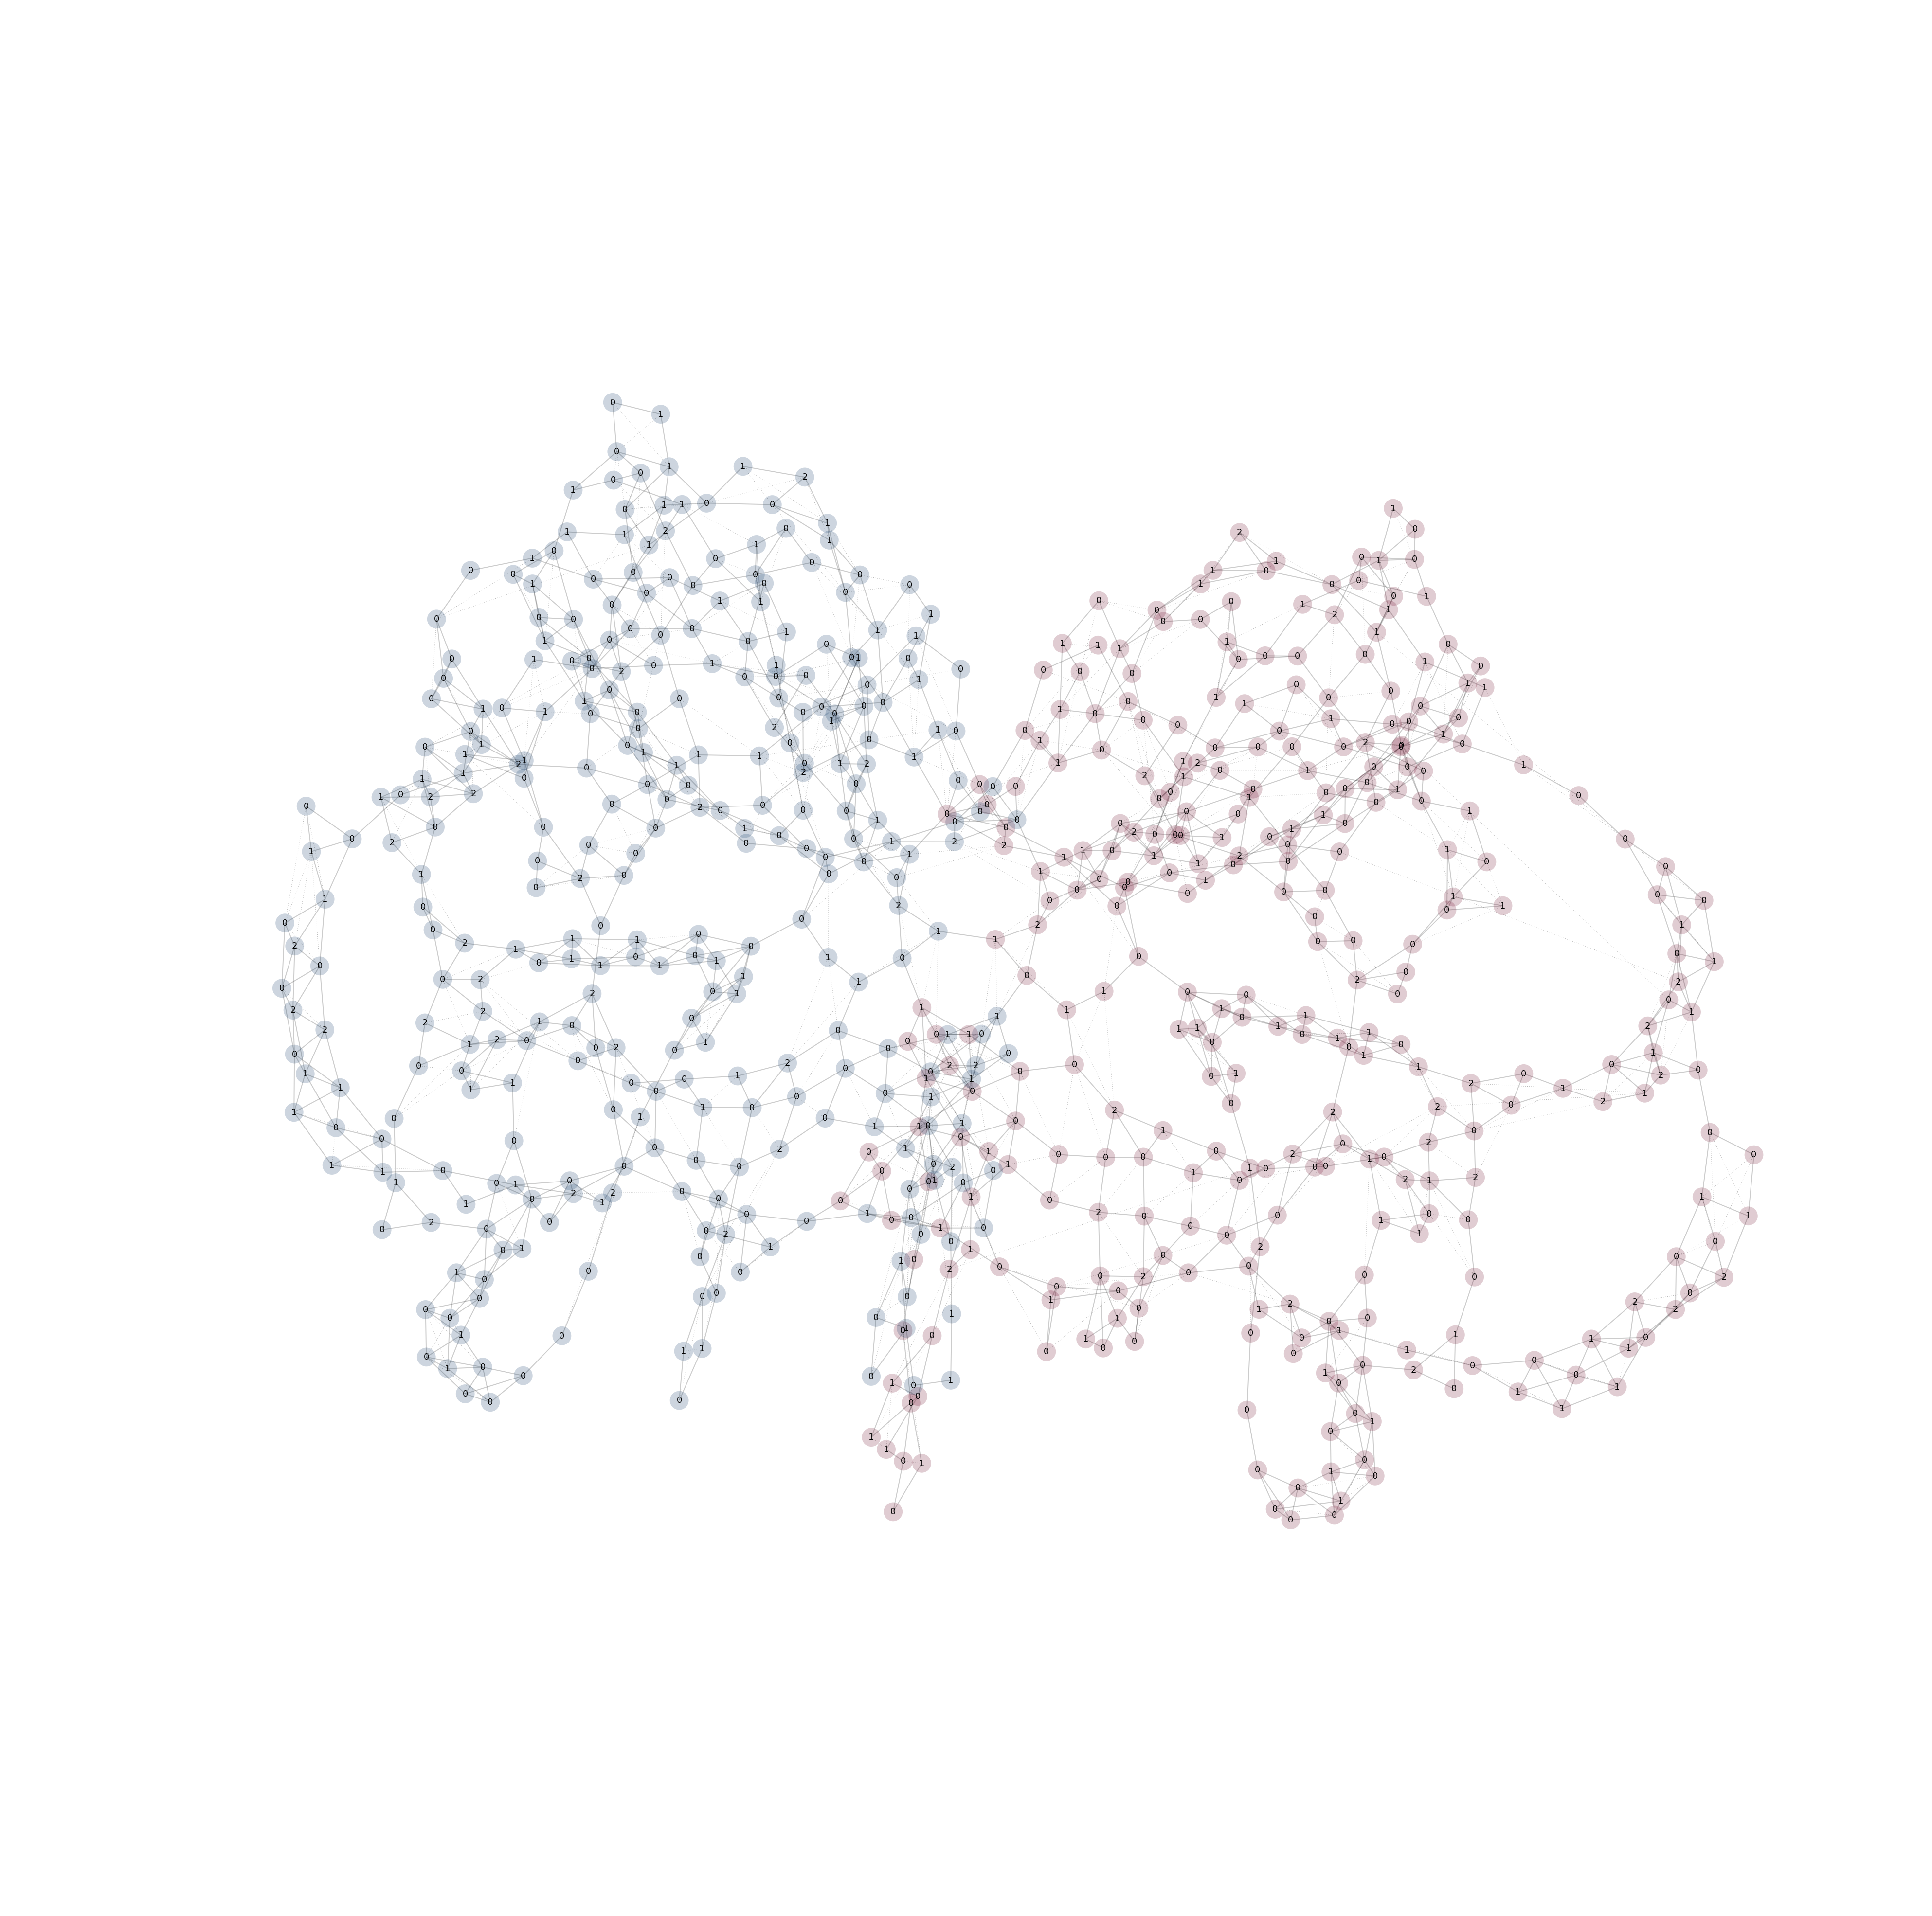

In [9]:
from eden_prot import make_protein_graph, relabel_protein_graph
protein_graph = make_protein_graph(structure,
                                   min_dist_conj=3.5,
                                   max_dist_conj=5.5,
                                   max_dist_disj=6)
protein_graph = relabel_protein_graph(protein_graph, scheme='code_3')
from eden_prot.display import draw_protein
draw_protein(protein_graph)

---